ANALYZING AMAZON SALES DATA

Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.

In the following Document presents the Sales trends yearly and monthly nd other key attributes and relationships.

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [138]:
df=pd.read_csv("Amazon Sales data.csv")
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [139]:
df.shape

(100, 14)

In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order ID,100.0,5.550204e+08,2.606153e+08,1.146066e+08,3.389225e+08,5.577086e+08,7.907551e+08,9.940222e+08
Units Sold,100.0,5.128710e+03,2.794485e+03,1.240000e+02,2.836250e+03,5.382500e+03,7.369000e+03,9.925000e+03
Unit Price,100.0,2.767613e+02,2.355922e+02,9.330000e+00,8.173000e+01,1.798800e+02,4.372000e+02,6.682700e+02
Unit Cost,100.0,1.910480e+02,1.882082e+02,6.920000e+00,3.584000e+01,1.072750e+02,2.633300e+02,5.249600e+02
Total Revenue,100.0,1.373488e+06,1.460029e+06,4.870260e+03,2.687212e+05,7.523144e+05,2.212045e+06,5.997055e+06
Total Cost,100.0,9.318057e+05,1.083938e+06,3.612240e+03,1.688680e+05,3.635664e+05,1.613870e+06,4.509794e+06
Total Profit,100.0,4.416820e+05,4.385379e+05,1.258020e+03,1.214436e+05,2.907680e+05,6.358288e+05,1.719922e+06


In [141]:
# pd.options.display.max_columns=None
# pd.options.display.max_rows=None
# display(raw_data)

In [142]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [143]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [144]:
#checking for null values
df.isnull().any()

Region            False
Country           False
Item Type         False
Sales Channel     False
Order Priority    False
Order Date        False
Order ID          False
Ship Date         False
Units Sold        False
Unit Price        False
Unit Cost         False
Total Revenue     False
Total Cost        False
Total Profit      False
dtype: bool

In [145]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit


In [146]:
a1=raw_data['Region'].unique()
a2=raw_data['Country'].unique()
df['Order Priority'].unique()
# len(df['Item Type'].unique())

array(['H', 'C', 'L', 'M'], dtype=object)

EXPLORING DATA

*Region* -  The Region of the country in which the sales has occured;there are 7 regions.   
*Country* - Country of the Sale; there are 76 countries.      
*Item Type* - The type of item that has been sold ; there are 12 unique items.    
*Sales Channel* - If the sale has been through Online Channel or Offline Channel.   
*Order Priority* - Priority of the order; There are 4 different categories of priority.  
*Order Date* - Date of the order that has been placed.
*Order ID* - Unique identification of the order.
*Ship Date* - The date on which the order has been shipped.      
*Units Sold* - The amount ofUnits sold in the Order.
*Unit Price* - The Unit Price refers to the cost per individual item.    
*Unit Cost* - The Unit encompasses all costs associated with producing or acquiring that item.      
*Total Revenue* - Refers to the total income recived from selling the order.  
*Total Cost*  - Refers to the total cost in the production of the goods.    
*Total Profit* - Refers to the total profit made by the sale of that particular order.

In [147]:
numeric_features= [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features= [feature for feature in df.columns if df[feature].dtype =='O']

print('We have {} numerical features:{}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features:{}'.format(len(categorical_features), categorical_features))

We have 7 numerical features:['Order ID', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
We have 7 categorical features:['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Ship Date']


In [148]:
#Augmenting a new column with months

df['Month']= df['Order Date'].str[0:2]
df['Month']=df['Month']
df


      

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5/
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,8/
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,5/
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,6/
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72,7/
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47,11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05,6/
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02,7/


In [149]:
#removing extra "/" character in Month

df['Month'] = df['Month'].apply(lambda x: x.replace("/", " "))

In [150]:
df['Month']=df['Month'].astype('int32')
df


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,8
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72,7
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47,11
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05,6
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02,7


ADDING A SALES COLUMN

In [151]:
#sales= Units Sold * Units Price
df['Sales']= df['Units Sold']* df['Unit Price']
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Month,Sales
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2533654.00
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,8,576782.80
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,1158502.59
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,6,75591.66
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,3296425.02


Months with highest Sales

In [152]:
df.groupby('Month').sum()['Sales']

Month
1     10482467.12
2     24740517.77
3      2274823.87
4     16187186.33
5     13215739.99
6      5230325.77
7     15669518.50
8      1128164.91
9      5314762.56
10    15287576.61
11    20568222.76
12     7249462.12
Name: Sales, dtype: float64

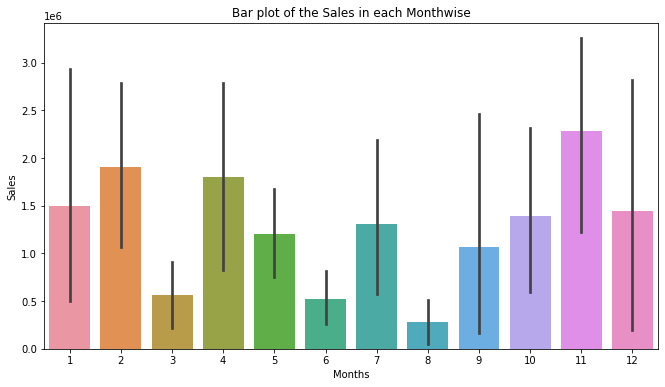

In [158]:
plt.figure(figsize=(11,6))

sns.barplot(x=df.Month,y=df.Sales)
plt.title("Bar plot of the Sales in each Monthwise")
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

In [154]:
#Adding a Year Column



In [155]:
df['Year'] = pd.DatetimeIndex(df['Order Date']).year


In [156]:
df.groupby('Year').sum()['Sales']

Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Sales, dtype: float64

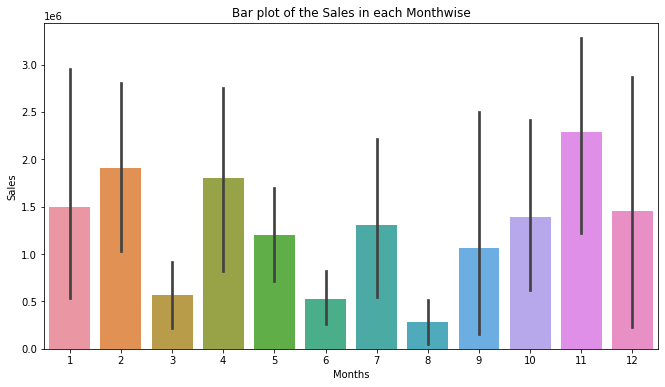

In [159]:
#plt.bar(df['Year'],df['Sales'])
plt.figure(figsize=(11,6))

sns.barplot(x=df.Month,y=df.Sales)
plt.title("Bar plot of the Sales in each Monthwise")
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

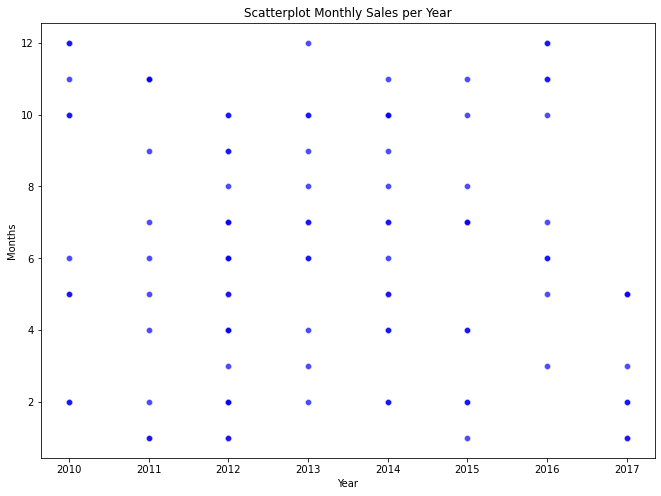

In [172]:
plt.figure(figsize=(11,8))

sns.scatterplot(data=df['Sales'],x=df['Year'] ,y =df['Month'],color='blue',
                edgecolor='linen',alpha= 0.7)
plt.title("Scatterplot Monthly Sales per Year")
plt.xlabel('Year')
plt.xticks=df['Month']
plt.ylabel('Months')
plt.show()

#### City with highest numer of Sales

In [205]:
results =df.groupby('Region').sum()['Sales']

region = pd.DataFrame(df['Region'].unique())
region

,0
0,Australia and Oceania
1,Central America and the Caribbean
2,Europe
3,Sub-Saharan Africa
4,Asia
5,Middle East and North Africa
6,North America


<Figure size 792x432 with 0 Axes>

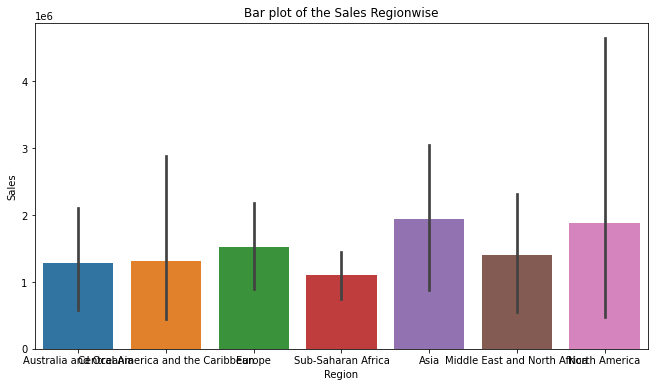

In [209]:
plt.figure(figsize=(11,6))

# plt.bar(region,results)
# plt.xlabel('Regions of Sales')
# plt.ylabel('Sales in different Regions')
# #plt.xticks(rotation='vertical')
# plt.show()

plt.figure(figsize=(11,6))

sns.barplot(df.Region,y=df.Sales)
plt.title("Bar plot of the Sales Regionwise")
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

In [211]:
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Month,Sales,Year,Order Datetime
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2533654.00,2010,2010-05-28
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,8,576782.80,2012,2012-08-22
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,1158502.59,2014,2014-05-02
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,6,75591.66,2014,2014-06-20
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,3296425.02,2013,2013-02-01


In [210]:
#df['Order Datetime']=pd.to_datetime(df['Order Date'])

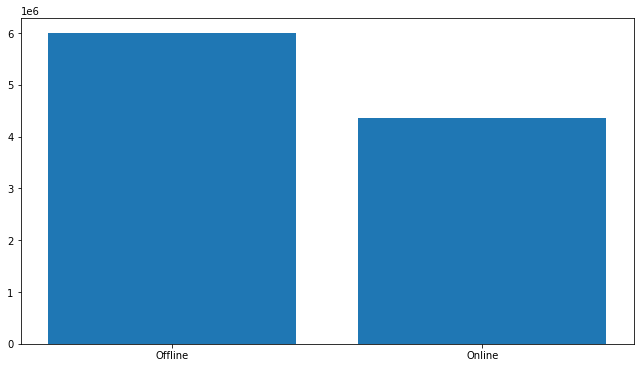

In [219]:
plt.figure(figsize=(11,6))
plt.bar(df['Sales Channel'],df['Sales'])
plt.show()

In [221]:
df['Grouped']= df.groupby('Order Priority')['Item Type'].transform(lambda x:',' .join(x))

In [224]:
df1=df[['Order ID', 'Grouped']].drop_duplicates()
df1.head(100)


,Order ID,Grouped
0,669165933,"Baby Food,Vegetables,Cereal,Vegetables,Clothes..."
1,963881480,"Cereal,Fruits,Baby Food,Personal Care,Beverage..."
2,341417157,"Office Supplies,Office Supplies,Clothes,Househ..."
3,514321792,"Cereal,Fruits,Baby Food,Personal Care,Beverage..."
4,115456712,"Office Supplies,Office Supplies,Clothes,Househ..."
...,...,...
95,512878119,"Household,Personal Care,Clothes,Cosmetics,Frui..."
96,810711038,"Office Supplies,Office Supplies,Clothes,Househ..."
97,728815257,"Cereal,Fruits,Baby Food,Personal Care,Beverage..."
98,559427106,"Household,Personal Care,Clothes,Cosmetics,Frui..."


In [225]:
from itertools import combinations
from collections import Counter


In [230]:
count=Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,4)))
    
#print(count)   

count.most_common(10)

[(('Vegetables', 'Cereal', 'Cosmetics', 'Cosmetics'), 5160),
 (('Vegetables', 'Clothes', 'Cosmetics', 'Cosmetics'), 4470),
 (('Vegetables', 'Cosmetics', 'Cosmetics', 'Cosmetics'), 4410),
 (('Baby Food', 'Cereal', 'Cosmetics', 'Cosmetics'), 4140),
 (('Cereal', 'Cosmetics', 'Cosmetics', 'Cosmetics'), 4110),
 (('Vegetables', 'Fruits', 'Cosmetics', 'Cosmetics'), 3570),
 (('Baby Food', 'Cosmetics', 'Cosmetics', 'Cosmetics'), 3390),
 (('Vegetables', 'Cosmetics', 'Cereal', 'Cosmetics'), 3300),
 (('Cereal', 'Clothes', 'Cosmetics', 'Cosmetics'), 3300),
 (('Household', 'Cereal', 'Cosmetics', 'Cosmetics'), 3300)]

In [248]:
#products that sold the most

pg=df.groupby('Item Type')
quantity_ordered = pg.sum()['Units Sold']
quantity_ordered=(quantity_ordered)

Product_type=df['Item Type'].unique()


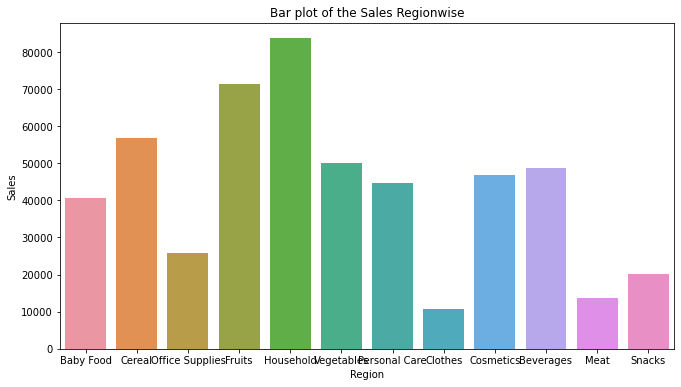

In [249]:
plt.figure(figsize=(11,6))

sns.barplot(Product_type, quantity_ordered)
plt.title("Bar plot of the Sales Regionwise")
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

In [251]:
prices= df.groupby('Item Type').mean()['Unit Price']
print(prices)

Item Type
Baby Food          255.28
Beverages           47.45
Cereal             205.70
Clothes            109.28
Cosmetics          437.20
Fruits               9.33
Household          668.27
Meat               421.89
Office Supplies    651.21
Personal Care       81.73
Snacks             152.58
Vegetables         154.06
Name: Unit Price, dtype: float64


TypeError: only length-1 arrays can be converted to Python scalars

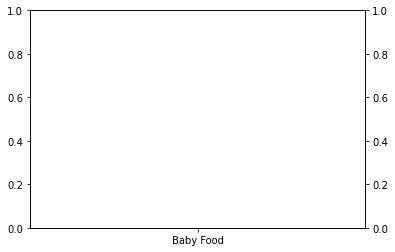

In [253]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Product_type, quantity_ordered, 'g-')
ax2.plot(Product_type,prices, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity', color='g')
ax2.set_ylabel('Prices', color='b')

plt.show()